# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Amanda Hanway
### Repository: https://github.com/mandi1120/article-summarizer 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

-----
#### QUESTION 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [13]:
import requests
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

article_page = requests.get('https://www.theatlantic.com/technology/archive/2022/11/elon-musk-twitter-bad-habit/672249/')
article_html = article_page.text

# create pickle file for exercises
with open('elon-musk-twitter-bad-habit.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    
# create html file to submit   
soup = BeautifulSoup(article_html, 'html5lib')    
article_content = soup.find('article')   
with open("elon-musk-twitter-bad-habit.html", "w", encoding = 'utf-8') as file:
    file.write(article_content.get_text())

-----
#### QUESTION 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [14]:
dashes = "\n----------------------------------------"

# read in the article's html source from the file created in q. 1
with open('elon-musk-twitter-bad-habit.pkl', 'rb') as f:
    article_html = pickle.load(f)
    
soup = BeautifulSoup(article_html, 'html5lib')    
article_content = soup.find('article')    
print("\nARTICLE CONTENT:\n", article_content.get_text(), dashes)    

# do sentiment analysis and the article text using spacy
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# print the polarity score with an appropriate label
polarity = doc._.blob.polarity
print("ARTICLE POLARITY SCORE:", round(polarity,3), dashes)        

# print the number of sentences in the original article with an appropriate label
sentences = list(doc.sents)
sentence_count = 0
for s in sentences:
    sentence_count +=1
print("ARTICLE SENTENCE COUNT:", sentence_count, dashes)    


ARTICLE CONTENT:
 TechnologyThe Madness of TwitterPeople just can’t stop tweeting about all the tweets they see.By Ian BogostGetty; The AtlanticNovember 22, 2022ShareWe are living through the most Twittery moment of all time. Since Elon Musk took over Twitter, whose users sometimes call it a “hellsite,” tweeters have been tweeting in panic mode, as if from an aircraft about to careen into a mountainside. Woe, Musk is ruining Twitter! The service will collapse! It’s sure to grind to a halt any day now! Where will we go next? Some are even calling the exfiltration to platforms such as Mastodon (a bewildering perplexity), Hive (a CIA front?), and Post (what even is this?) a search for “lifeboats.” The result is super embarrassing and even profoundly shameful.Yes, look, okay, there are actual stakes here. Elon Musk, a prolific tweeter and also the richest man in the world despite losing $100 billion this year, might be single-handedly destroying a major social-media platform. At the very 

-----
#### QUESTION 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [4]:
# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# count token frequency 
token_freq = Counter(map(str,interesting_tokens))
five_most_common = token_freq.most_common(5)

# print 5 most common tokens with label
print("\n5 most common tokens:\n ", five_most_common)

# print 5 most common tokens with appropriate labels & frequencies
print("\n5 most common tokens with appropriate labels and frequencies:") 
c = 0
for x in five_most_common:
    c +=1
    print(f"  #{c} Most common token is", '\x1b[1m'+str(five_most_common[c-1][0])+'\x1b[0m', 
          "with a count of", '\x1b[1m'+str(five_most_common[c-1][1])+'\x1b[0m') 


5 most common tokens:
  [('twitter', 28), ('tweets', 15), ('musk', 9), ('news', 8), ('tweeting', 7)]

5 most common tokens with appropriate labels and frequencies:
  #1 Most common token is twitter with a count of 28
  #2 Most common token is tweets with a count of 15
  #3 Most common token is musk with a count of 9
  #4 Most common token is news with a count of 8
  #5 Most common token is tweeting with a count of 7


-----
#### QUESTION 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [6]:
# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# count lemma frequency 
lemma_freq = Counter(interesting_lemmas)
five_most_common = lemma_freq.most_common(5)

# print 5 most common lemmas with labels
print("\n5 most common lemmas:\n ", five_most_common)

# print 5 most common lemmas with appropriate labels & frequencies
print("\n5 most common lemmas with appropriate labels and frequencies:") 
c = 0
for x in five_most_common:
    c +=1
    print(f"  #{c} Most common lemma is", '\x1b[1m'+str(five_most_common[c-1][0])+'\x1b[0m', 
          "with a count of", '\x1b[1m'+str(five_most_common[c-1][1])+'\x1b[0m') 


5 most common lemmas:
  [('tweet', 31), ('twitter', 28), ('musk', 9), ('news', 8), ('post', 7)]

5 most common lemmas with appropriate labels and frequencies:
  #1 Most common lemma is tweet with a count of 31
  #2 Most common lemma is twitter with a count of 28
  #3 Most common lemma is musk with a count of 9
  #4 Most common lemma is news with a count of 8
  #5 Most common lemma is post with a count of 7


-----
#### QUESTION 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


SENTENCE SCORE LIST USING TOKENS:
 [0.13333, 0.0, 0.09677, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333, 0.05263, 0.0, 0.0, 0.04348, 0.0, 0.02564, 0.11765, 0.18182, 0.0, 0.04545, 0.02381, 0.03846, 0.11111, 0.0625, 0.03125, 0.04167, 0.0, 0, 0.03125, 0.05882, 0.0303, 0.05405, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.09091, 0.06818, 0.15385, 0.11765, 0.04348, 0.0, 0.08333, 0.08108, 0.02941, 0.0, 0.11111, 0.0, 0.0, 0.07692, 0.17857, 0.01961, 0.0, 0.0, 0.0, 0.0, 0.05556, 0.0, 0.0, 0.12121, 0.0, 0.0625, 0.13333]


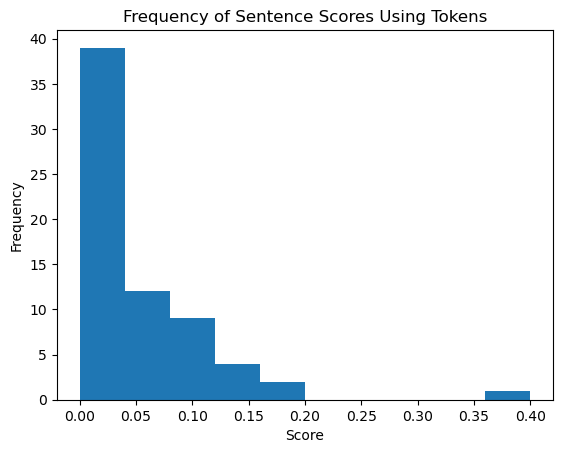

'ANSWER: The most common range of scores is 0 to 0.04 '

In [7]:
# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# count token frequency 
token_freq = Counter(map(str,interesting_tokens))

# important words, 5 most common 
important_tokens = set()
for word, freq in token_freq.most_common(5):
    important_tokens.add(word)
# print("\n5 MOST COMMON TOKENS:", important_tokens, "\n")

# count number of words in each sentence
sentences = list(doc.sents)
sentence_count = 0
sentence_score_list = list()

for sentence in sentences:
    sentence_count +=1
    important_count = 0
    total_count = 0
    
    for token in sentence:
        #count important words in sentence
        if token.text.lower() in important_tokens:
            important_count += 1
        
        #count total words in sentence
        if not(token.is_space or token.is_punct):
            total_count += 1
    
    score = 0 if total_count == 0 else round(important_count/total_count, 5)
    sentence_score_list.append(score)

print("\nSENTENCE SCORE LIST USING TOKENS:\n", sentence_score_list)

# plot a histogram with scores
import matplotlib.pyplot as plt
plt.hist(sentence_score_list)
plt.title('Frequency of Sentence Scores Using Tokens')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

'''QUESTION: From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?'''
'''ANSWER: The most common range of scores is 0 to 0.04 '''

-----
#### QUESTION 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


SENTENCE SCORE LIST USING LEMMAS:
 [0.13333, 0.0, 0.09677, 0.4, 0.0, 0.0, 0.0, 0.04167, 0.0, 0.0, 0.0, 0.03333, 0.10526, 0.0, 0.0, 0.04348, 0.2, 0.05128, 0.17647, 0.18182, 0.0, 0.04545, 0.02381, 0.03846, 0.11111, 0.0625, 0.03125, 0.04167, 0.0, 0, 0.09375, 0.05882, 0.06061, 0.05405, 0.0, 0.0, 0.0, 0.05882, 0.2, 0.0, 0.09091, 0.09091, 0.15385, 0.11765, 0.04348, 0.0, 0.08333, 0.10811, 0.02941, 0.0, 0.11111, 0.0625, 0.0, 0.07692, 0.17857, 0.03922, 0.0, 0.0, 0.0, 0.0, 0.05556, 0.0, 0.0, 0.12121, 0.14286, 0.125, 0.13333]


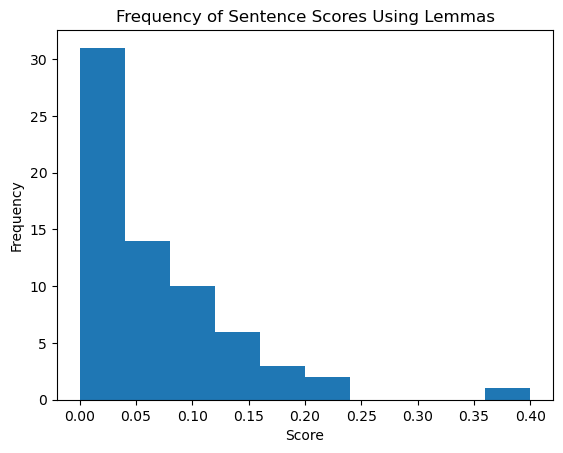

'ANSWER: The most common range of scores is 0 to 0.04 '

In [8]:
# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# count word frequency 
lemma_freq = Counter(interesting_lemmas)

# interesting lemmas, 5 most common 
cool_lemmas = set()
for l, freq in lemma_freq.most_common(5):
    cool_lemmas.add(l)
# print("5 MOST COMMON LEMMAS:", cool_lemmas, "\n")

# count number of words in each sentence
sentences = list(doc.sents)
sentence_score_list = list()

for sentence in sentences:
    important_count = 0
    total_count = 0
    
    for lem in sentence:
        #count important words in sentence
        if lem.lemma_.lower() in cool_lemmas:
            important_count += 1
        
        #count total words in sentence
        if not(lem.is_space or lem.is_punct):
            total_count += 1
    
    score = 0 if total_count == 0 else round(important_count/total_count, 5)
    sentence_score_list.append(score)
    
print("\nSENTENCE SCORE LIST USING LEMMAS:\n", sentence_score_list)

# plot a histogram with scores
import matplotlib.pyplot as plt
plt.hist(sentence_score_list)
plt.title('Frequency of Sentence Scores Using Lemmas')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

'''QUESTION: From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?'''
'''ANSWER: The most common range of scores is 0 to 0.04 '''

-----
#### QUESTION 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens):  0.082 (results in 15 sentences)
* Cutoff Score (lemmas):  0.11 (results in 15 sentences)

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

-----
#### QUESTION 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
# create a summary of the article 
# by adding each sentence to a list if its score (based on tokens) 
# is greater than the cutoff score 
# print the summary
cutoff_score = 0.082

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# count token frequency 
token_freq = Counter(map(str,interesting_tokens))

# important tokens, 5 most common 
important_tokens = set()
for tkn, freq in token_freq.most_common(5):
    important_tokens.add(tkn)
# print("5 MOST COMMON TOKENS:", important_tokens, "\n")

sentences = list(doc.sents)
token_summary_list = list()
sent_count = 0

for sent in sentences:
    important_count = 0
    total_count = 0
    
    for token in sent:
        #count important words in sentence
        if token.text.lower() in important_tokens:
            important_count += 1
        
        #count total words in sentence
        if not(token.is_space or token.is_punct):
            total_count += 1
    
    score = 0 if total_count == 0 else round(important_count/total_count, 5)
    
    #print(important_count, total_count, score, sent)
    
    if score > cutoff_score:
        token_summary_list.append(sent) 
        sent_count +=1
        
print("\nARTICLE SUMMARY USING TOKENS:\n" + ' '.join(str(s) for s in token_summary_list))
print("\nSENTENCE COUNT:", sent_count)


ARTICLE SUMMARY USING TOKENS:
TechnologyThe Madness of TwitterPeople just can’t stop tweeting about all the tweets they see. Since Elon Musk took over Twitter, whose users sometimes call it a “hellsite,” tweeters have been tweeting in panic mode, as if from an aircraft about to careen into a mountainside. Woe, Musk is ruining Twitter! Soon, nearly every tweet by Musk produced its own news story, as outlets followed the chaos live. Twitter teeters on the edge; Musk orders coders to HQ; A timeline of Elon Musk’s takeover; Twitter death watch captivates millions. Read: Twitter’s slow and painful endWith some reason. Some of those posts justify further discourse, including news stories. And yet, the very existence of tweets about an event can make that event seem newsworthy—by virtue of having garnered tweets. Either way, the nature of Twitter is to assert the importance of tweets. Tweets appear more meaningful when amplified, and when amplified they inspire more tweets in the same vein. 

-----
#### QUESTION 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
nlp = spacy.load('en_core_web_sm')
text = str(token_summary_list)
nlp.add_pipe("spacytextblob")
doc = nlp(text)

# Print the polarity score
polarity = doc._.blob.polarity
print("\nPOLARITY SCORE FOR ARTICLE SUMMARY USING TOKENS: ", round(polarity, 3))    

# print number of sentences
token_summary_sent_count = 0
for s in token_summary_list:
    token_summary_sent_count +=1
print("\nNUMBER OF SENTENCES: ", token_summary_sent_count)    


POLARITY SCORE FOR ARTICLE SUMMARY USING TOKENS:  0.21

NUMBER OF SENTENCES:  15


-----
#### QUESTION 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [11]:
# create a summary of the article 
# by adding each sentence to a list if its score (based on lemmas) 
# is greater than the cutoff score 
# print the summary
cutoff_score = 0.11

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# count lemma frequency 
lemma_freq = Counter(interesting_lemmas)

# important lemmas, 5 most common 
important_lemmas = set()
for lem, freq in lemma_freq.most_common(5):
    important_lemmas.add(lem)
# print("5 MOST COMMON LEMMAS:", important_lemmas, "\n")

sentences = list(doc.sents)
lemma_summary_list = list()
sent_count = 0

for sent in sentences:
    important_count = 0
    total_count = 0
    
    for lem in sent:
        #count important words in sentence
        if lem.lemma_.lower() in important_lemmas:
            important_count += 1
        
        #count total words in sentence
        if not(lem.is_space or lem.is_punct):
            total_count += 1
    
    score = 0 if total_count == 0 else round(important_count/total_count, 5)
    
    #print(important_count, total_count, score, sent)
    
    if score > cutoff_score:
        lemma_summary_list.append(sent) 
        sent_count +=1
        
print("\nARTICLE SUMMARY USING LEMMAS:\n" + ' '.join(str(s) for s in lemma_summary_list))
print("\nSENTENCE COUNT:", sent_count)


ARTICLE SUMMARY USING LEMMAS:
TechnologyThe Madness of TwitterPeople just can’t stop tweeting about all the tweets they see. Woe, Musk is ruining Twitter! All throughout, others tweeted nearby. Soon, nearly every tweet by Musk produced its own news story, as outlets followed the chaos live. Twitter teeters on the edge; Musk orders coders to HQ; A timeline of Elon Musk’s takeover; Twitter death watch captivates millions. Read: Twitter’s slow and painful endWith some reason. Some of those posts justify further discourse, including news stories. Either way, the nature of Twitter is to assert the importance of tweets. Tweets appear more meaningful when amplified, and when amplified they inspire more tweets in the same vein. Twitter shapes an epistemology for users under its thrall. Producers of supposedly actual news see the world through tweet-colored glasses, by transforming tweets’ hypothetical status as news into published news—which produces more tweeting in turn. What more perfect u

-----
#### QUESTION 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [12]:
nlp = spacy.load('en_core_web_sm')
text = str(lemma_summary_list)
nlp.add_pipe("spacytextblob")
doc = nlp(text)

# Print the polarity score
polarity = doc._.blob.polarity
print("\nPOLARITY SCORE FOR ARTICLE SUMMARY USING LEMMAS: ", round(polarity, 3))    

# print number of sentences
lemma_summary_sent_count = 0
for s in lemma_summary_list:
    lemma_summary_sent_count +=1
print("\nNUMBER OF SENTENCES: ", lemma_summary_sent_count)    


POLARITY SCORE FOR ARTICLE SUMMARY USING LEMMAS:  0.226

NUMBER OF SENTENCES:  15


-----
#### QUESTION 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

##### Answer:

Initial Article:
> Polarity Score:  0.145 <br>

Article Summary:
> Polarity Score Using Tokens:  0.21 <br>
> Polarity Score Using Lemmas:  0.226

Yes, there is a difference from the polarity score of the original article and those generated from the token/lemma summaries.
The initial score of 0.145 was lower than those from the tokens and lemmas. <br>

The reason for this could be that by first identifying tokens, and summarizing the article to keep only the important sentences with token scores above a certain threshold, then repeating the process to further summarize the article using lemmatization, sentences that were less-important to the main purpose of the article were removed. These filler sentences may have been bringing the original polarity score down.  Reading through the original article, the filler sentences seem to be more sarcastic in nature, which makes sense that they may lower the polarity score.<br>


-----
#### QUESTION 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

##### Answer:
I think the lemma summary would be more accurate as far as identifying and summarizing the true intention of the article.  <br>

Using lemmatization, words are grouped under their base root and analyzed together. In this process, the word "tweets" and "tweeting" are grouped under the same base root, whereas, using tokens these words are kept separate. As a result, in the token summary we see fewer distinct base words being identified as important than in the lemma summary.  <br>

The lemmatization method is better at identifying these duplicative base words, allowing for a larger number of important words to be identified that add value to the article and its summary.

